# Measurement system analysis (MSA)

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Measurement system analysis (MSA)</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2018-10-29</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-06-25</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">msa.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">msa.csv | control_chart_constants.csv</td>
    </tr>
</table>

# In brevi

This Jupyter notebook performs Wheeler's Evaluating the Measurement Process (EMP) analysis. My desire is that it will replace the Minitab macro.

# Download the data

Download the two data files:

- [msa.csv](https://drive.google.com/open?id=1VCTWoHgT_O2xyQZBuhQcx1TGYK6mu3lb)
- [control_chart_constants.csv](https://drive.google.com/open?id=1Y3wviqWNa8sZe7gg4g3R-unDGEtKB7QO)

# Methodology

This Jupyter notebook uses Donald J. Wheeler's Evaluation the Measurement Process methodology.

# Read the data file

The data file is in CSV format. There are three columns: moisture, part, and operator. The first is in floating point format, and the second and third are in integer format.

In [1]:
# Import the initial, required libraries and modules.
import pandas as pd
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# File has four or more columns: operator (int), part (int) and y (float).
df = pd.read_csv('msa.csv')
df

,operator,part,y1,y2
0,1,1,61.60,61.87
1,1,2,61.03,61.89
2,1,3,62.29,62.02
3,1,4,61.22,61.60
4,1,5,61.25,61.28
5,1,6,61.22,61.11
6,1,7,61.22,61.32
7,1,8,61.35,61.53
8,1,9,61.58,62.19
9,1,10,61.60,61.29


In [3]:
# Sort the data by operator and part.
df.sort_values(['operator', 'part'], inplace=True)
df

,operator,part,y1,y2
0,1,1,61.60,61.87
1,1,2,61.03,61.89
2,1,3,62.29,62.02
3,1,4,61.22,61.60
4,1,5,61.25,61.28
5,1,6,61.22,61.11
6,1,7,61.22,61.32
7,1,8,61.35,61.53
8,1,9,61.58,62.19
9,1,10,61.60,61.29


In [4]:
# Set operator as the index.
df.set_index(['operator', 'part'], inplace=True)

In [5]:
# Calculate the range for each operator by part combination.
df['range'] = (df.max(axis='columns') - df.min(axis='columns'))

In [6]:
# Determine the d2 and d3 constants.
constants = pd.read_csv('control_chart_constants.csv')
subgroup_size = len(df.columns) - 1
d_two = constants['d2'][constants['n'] == subgroup_size].values[0]
d_three = constants['d3'][constants['n'] == subgroup_size].values[0]

In [7]:
# Define for the range chart the graph title and subtitle,
# and the x and y axis labels.
r_chart_title = 'Range control chart'
r_chart_subtitle = 'Thickness range (mm)'
r_chart_ylabel = 'Thickness range (mm)'
r_chart_xlabel = 'Operator--Part'

In [8]:
# Range chart statistics.
# Calculate the average range.
average_range = df['range'].mean()

In [9]:
# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_range + \
    3 * d_three * average_range / d_two

In [10]:
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_range - \
    3 * d_three * average_range / d_two

In [11]:
# Set the moving range lower control limit to 0 if it is < 0.
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0

In [12]:
df.reset_index(inplace=True)

In [13]:
df.set_index(['operator', 'part', 'range'], inplace=True)

In [14]:
#df['operator_part'] = df['operator'].astype(str) + ' ' + \
#df['part'].astype(str)

In [15]:
df['average'] = df.mean(axis='columns')

In [16]:
df.reset_index(inplace=True)

# Range chart

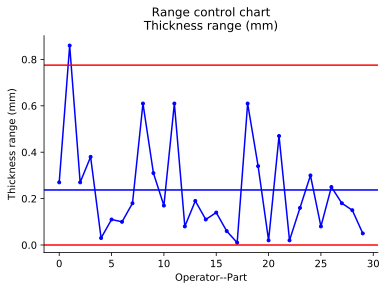

In [17]:
# Create a graph of "range values v. operator-part".
ax = df.plot.line(y='range',legend=False, marker='o', \
                  markersize=3, color='blue')
ax.axhline(y=average_range, color='b')
ax.axhline(y=range_chart_upper_control_limit, color='r')
ax.axhline(y=range_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(r_chart_title + '\n' + r_chart_subtitle)
# Add the y axis label.
ax.set_ylabel(r_chart_ylabel)
# Add the x axis label.
ax.set_xlabel(r_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('r.svg', format='svg')
ax.figure.savefig('r.pdf', format='pdf')

In [18]:
# Define for the average chart the graph title and subtitle, and the x and y axis labels.
xbar_chart_title = 'Average control chart'
xbar_chart_subtitle = 'Thickness average (mm)'
xbar_chart_ylabel = 'Thickness average (mm)'
xbar_chart_xlabel = 'Operator--Part'

In [19]:
# Average chart statistics.
# Calculate the average of averages.
average_of_averages = df['average'].mean()

In [20]:
# Calculate the average chart upper control limit.
average_chart_upper_control_limit = average_of_averages + 3 * d_three * \
    average_range / (d_two * math.sqrt(subgroup_size))

In [21]:
# Calculate the average chart lower control limit.
average_chart_lower_control_limit = average_of_averages - 3 * d_three * \
    average_range / (d_two * math.sqrt(subgroup_size))

# Average chart

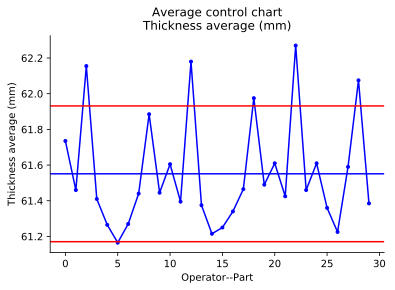

In [22]:
# Create a graph of "range values v. operator-part".
ax = df.plot.line(y='average',legend=False, marker='o', \
                  markersize=3, color='blue')
ax.axhline(y=average_of_averages, color='b')
ax.axhline(y=average_chart_upper_control_limit, color='r')
ax.axhline(y=average_chart_lower_control_limit, color='r')
# Remove the top and right spines.
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
# Add the chart title and subtitle.
ax.set_title(xbar_chart_title + '\n' + xbar_chart_subtitle)
# Add the y axis label.
ax.set_ylabel(xbar_chart_ylabel)
# Add the x axis label.
ax.set_xlabel(xbar_chart_xlabel)
# Save the graph as svg and pdf.
ax.figure.savefig('xbar.svg', format='svg')
ax.figure.savefig('xbar.pdf', format='pdf')

# Parallelism chart

# Analysis of main effects

# Analysis of mean ranges

# Honest MSA

## EMP results

## Classification

## Effective resolution

## Variance components

## Gauge R&R results

# References